# Tips/Gorjeta
Sugestões:
1. Análise Descritiva das Variáveis.
2. Análise de relação entre variáveis.
3. Visualização das análises.
4. Regressão linear simples e múltipla.

Perguntas possíveis:
5. Qual a relação entre as variáveis “smoker”, “sex” e “time” com a variável “tip”?
6. Se o restaurante quisesse fazer uma promoção, qual dia seria o melhor para ser realizada?
7. Descreva perfis de clientes e como os perfis se relacionam o consumo (“total_bill”)

Entrega:
- uma apresentação de slides com os insights gerados em formato .pdf


###*Installing Libs*

In [ ]:
!pip install scikit-learn --upgrade
!pip install imblearn --upgrade

     |████████████████████████████████| 6.8MB 2.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
Requirement already up-to-date: imblearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [ ]:
import pandas as pd # Importacao do pandas
import numpy as np # Importacao do numpy
import matplotlib.pyplot as plt # Importacao do matplotlib
import seaborn as sns # Importacao do sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MaksonViini/Teste/master/arquivos/tips.csv') # Lendo csv

###**Analise Exploratoria**

In [ ]:
df.duplicated().sum() # Verificando dados duplicados

1

In [ ]:
df.shape # Verificando o tamanho do dataset

(244, 7)

In [ ]:
df.nunique() # Verificando dados unicos

total_bill       229
tip              123
sex                2
smoker             2
day                4
time               2
size_of_group      6
dtype: int64

In [ ]:
df.info() # Informacoes sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_bill     244 non-null    float64
 1   tip            244 non-null    float64
 2   sex            244 non-null    object 
 3   smoker         244 non-null    object 
 4   day            244 non-null    object 
 5   time           244 non-null    object 
 6   size_of_group  244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
np.sum(df['tip']) # Total das gorjetas

731.5799999999999

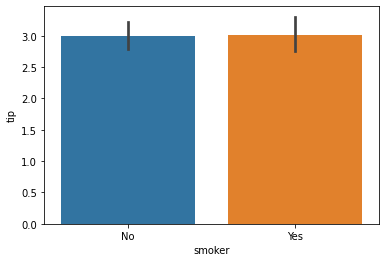

In [ ]:
sns.barplot(x='smoker',y='tip', data=df)  # E indiferente, parametros nao influenciam na gorjeta

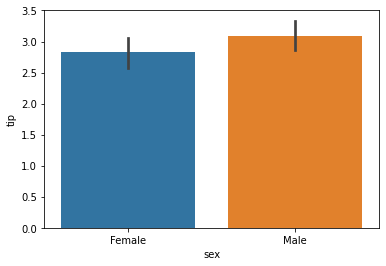

In [ ]:
sns.barplot(x='sex', y='tip', data=df) # Relacao de quem dar mais gorgeta por sexo, geralmente os homens dao maior nivel de gorjeta

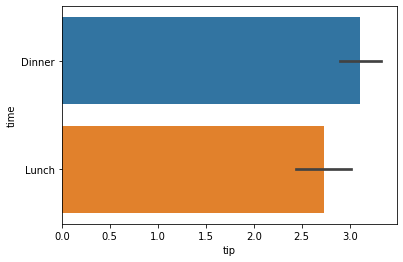

In [ ]:
sns.barplot(x='tip', y='time', data=df) # Grafico relacao o tempo Dinner/Launch com as gorgetas, geralmente o jantar e o que gera 
                                        # Maior quantidade de gorjetas

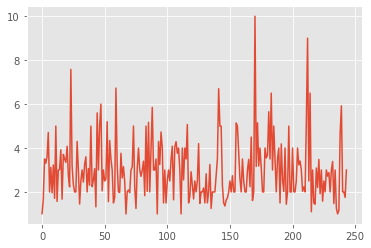

In [ ]:
plt.style.use("ggplot")
plt.plot(df.index, df['tip']) # Relacao de cada cliente com a quantidade de gorjeta

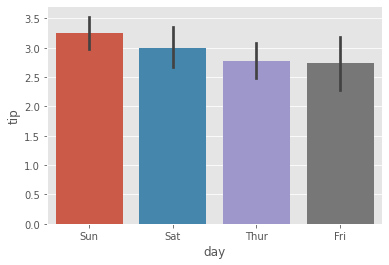

In [ ]:
sns.barplot(x='day',y='tip', data=df) # Relacao dias com gorjeta

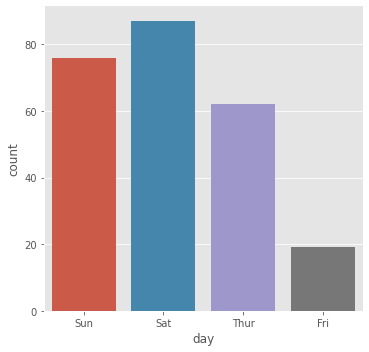

In [ ]:
sns.catplot(x='day', kind='count', data=df) # Grafico com contagem dos dias que mais tem clientes

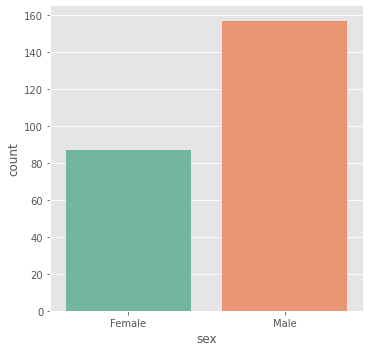

In [ ]:
sns.catplot(x='sex', kind='count', palette="Set2", data=df) # Contagem dos clientes, maioria e homem

{'boxes': [<matplotlib.lines.Line2D at 0x7f32124340f0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f32123ecb00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f320fb705c0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f320fb70240>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f32123e76a0>,
  <matplotlib.lines.Line2D at 0x7f32123e74e0>]}

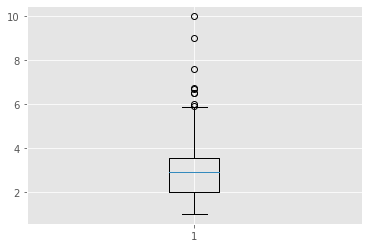

In [ ]:
plt.boxplot(df['tip']) # Boxplot para possiveis out

<BarContainer object of 244 artists>

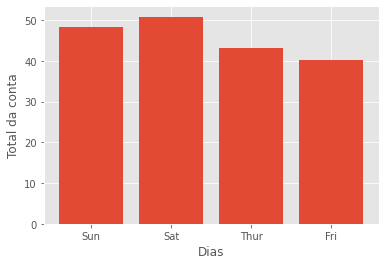

In [ ]:
plt.style.use("ggplot")
plt.xlabel('Dias')
plt.ylabel('Total da conta')
plt.bar(x=df['day'], height=df['total_bill']) 
# Relacao valor da conta com os dias, Sabado e  melhor dia para se fazer promocao
# Por causa que o valor das contas nesses dia sao perto de 50

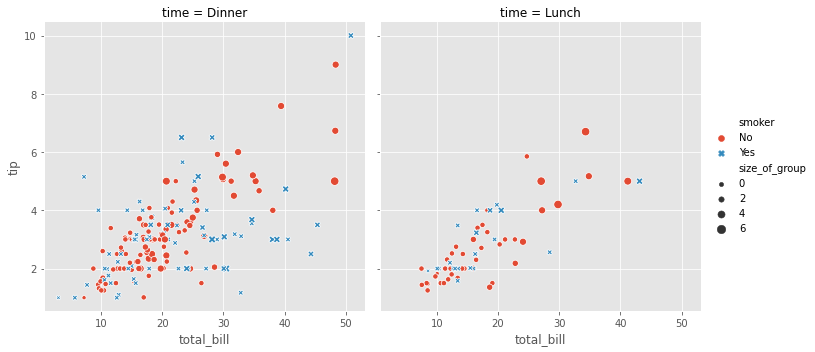

In [ ]:
# Visualizacao da relacao dos dados com as variaveis total_bill, tip, com separacao dos graficos por time
sns.relplot(
    data=df,
    x='total_bill', y='tip', col='time',
    hue='smoker', style='smoker', size='size_of_group',
)

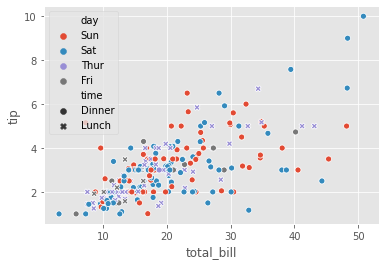

In [ ]:
sns.scatterplot(x="total_bill", y="tip", hue="day", style="time", data=df) # Visualizando relacao entre as variaveis total_bill, tip, day, smoker

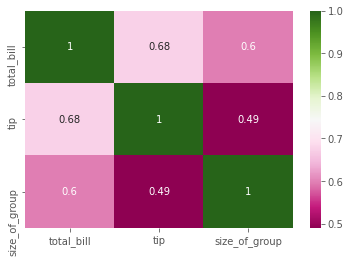

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="PiYG") # Matriz de confusao de correlacao

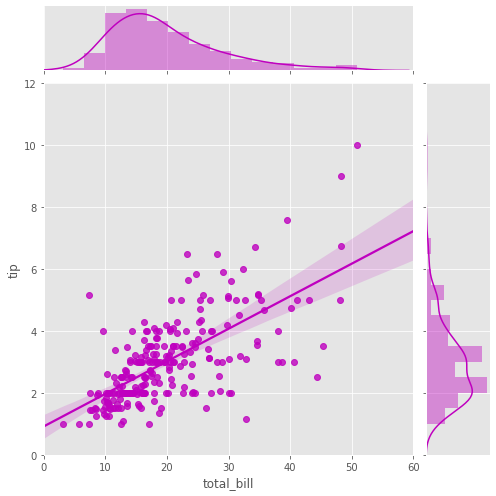

In [ ]:
# Visualizacao completa das juncoes dos dados de total_bill, com Tip
sns.jointplot(x="total_bill", y="tip", data=df,   
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [ ]:
df.isnull().sum() # Verificacao de dados nulos

total_bill       0
tip              0
sex              0
smoker           0
day              0
time             0
size_of_group    0
dtype: int64

In [ ]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size_of_group
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


###**Analise Descritiva**

In [ ]:
df.describe() # Descricao dos dados

,total_bill,tip,size_of_group
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.corr() # Correlacao entre os dados

,total_bill,tip,size_of_group
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size_of_group,0.598315,0.489299,1.000000


In [ ]:
df.cov() # Covariância entre os dados

,total_bill,tip,size_of_group
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size_of_group,5.065983,0.643906,0.904591


In [ ]:
df.median() # Mediana dos dados

total_bill       17.795
tip               2.900
size_of_group     2.000
dtype: float64

###**Divisao do Dataset e Modelo de Regressao Linear Simples**

### **Importando bibliotecas**

In [ ]:
#Chamando pacotes 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# definindo o modelo
ln_reg = LinearRegression()

In [ ]:
# Definindo as colunas da regressão linear
df_columnn_feat = df["total_bill"]
df_column_targe = df["tip"]

In [ ]:
# Dividindo o dataset em trieno e teste
X_train, X_test, y_train, y_test = train_test_split(df_columnn_feat, df_column_targe, test_size=0.30, random_state=42)

In [ ]:
X_train.describe()

count    170.000000
mean      20.313235
std        9.084757
min        5.750000
25%       13.420000
50%       17.850000
75%       25.157500
max       50.810000
Name: total_bill, dtype: float64

In [ ]:
X_test.describe()

count    74.000000
mean     18.574595
std       8.403007
min       3.070000
25%      13.007500
50%      17.560000
75%      22.397500
max      48.170000
Name: total_bill, dtype: float64

In [ ]:
#Transformando Dataframes em array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_train

array([15.53, 20.45, 34.65, 25.29, 38.01, 29.8 ,  9.78, 25.71, 20.08,
       11.17, 38.73, 16.21, 18.35, 15.42, 24.06, 21.7 , 13.94, 29.03,
        8.52, 16.32, 17.51, 10.29, 40.17, 17.47, 16.58, 17.92, 17.46,
       18.24, 15.98, 22.76, 16.43, 13.37, 10.07, 13.27, 23.17, 15.48,
       16.99, 21.01, 27.2 , 22.23, 11.35, 14.15, 11.87, 32.9 , 28.97,
       34.83, 50.81, 12.66, 21.01, 16.31, 27.05, 13.81, 15.77, 12.43,
       13.39, 10.33, 35.26, 35.83, 12.69, 14.07, 24.59, 14.26, 15.06,
       34.3 , 31.85, 16.  , 11.02,  8.51, 11.38, 12.16, 40.55, 12.02,
       16.47, 17.59, 30.4 , 30.14, 16.04, 15.95, 39.42, 45.35,  9.6 ,
       16.66, 31.27, 20.53, 32.4 , 22.75, 20.69,  9.68,  8.35, 15.69,
       23.68, 15.36,  9.94, 12.26, 13.42, 32.83, 10.09, 18.04, 13.81,
       19.44, 17.78, 12.74, 26.88, 15.81, 14.  , 22.49, 32.68, 11.59,
        8.58, 21.16, 15.04, 18.43, 48.27, 12.76, 20.27, 16.29, 20.76,
       26.86, 11.61, 18.26, 13.51, 13.42, 18.29, 25.56, 25.21, 12.54,
       24.01, 16.82,

In [ ]:
#Treinando o modelo
ln_reg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

In [ ]:
#criando as predicoes sobre teste
vlr_predict = ln_reg.predict(X_test.reshape(-1,1))

In [ ]:
#imprimindo os coeficientes
print("Intercept: \n", ln_reg.intercept_)
print('Coefficients: \n', ln_reg.coef_)

#imprimindo as métricas
print('MSE: %.2f'% mean_squared_error(y_test, vlr_predict))
print('R2: %.2f'% r2_score(y_test, vlr_predict))

Intercept: 
 [0.87695764]
Coefficients: 
 [[0.10889371]]
MSE: 0.75
R2: 0.43


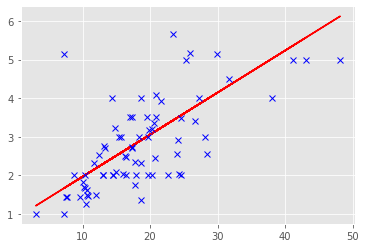

In [ ]:
#Para plotar imagens
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Plotando Predições do modelo regressão simples 
plt.plot(X_test, vlr_predict, color="red")

#Amotras de teste (azual)
plt.plot(X_test, y_test, 'bx')

plt.show()

# **Regressão Multipla**

In [ ]:
# Definição do target
df_column_target = df["tip"]

In [ ]:
# Criando novo dataframe
df_reg_mult = df.copy()
df_reg_mult

,total_bill,tip,sex,smoker,day,time,size_of_group
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df_reg_mult = df_reg_mult.drop(['tip', 'sex', 'smoker', 'day','time'], axis='columns')
df_reg_mult

,total_bill,size_of_group
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


In [ ]:
df_columnn_feat = df_reg_mult.iloc[:]

In [ ]:
df_columnn_feat

,total_bill,size_of_group
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


In [ ]:
# Definindo nosso modelo
ln_multipla = LinearRegression()

In [ ]:
# Dividindo novamente o dataset em trieno e teste
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(df_columnn_feat, df_column_target, test_size=0.30, random_state=42)

In [ ]:
# Treinando modelo
ln_multipla.fit(X_train_m, y_train_m)

LinearRegression()

In [ ]:
# Gravando as novas predições
pred_multipla = ln_multipla.predict(X_test_m)

In [ ]:
# Avaliação do modelo com R2
print("R2: {}".format(ln_multipla.score(X_test_m, y_test_m)))

R2: 0.3605903119796182


In [ ]:
df_final_mult = X_test_m

In [ ]:
# Ajustando o dataset com os valores preditos
for j in range(0,73):
  index = df_final_mult.sort_index().index[j]
  df_final_mult.loc[index,'tip'] = pred_multipla[j]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
# Ajustando o dataset com as features sex, smoker, day e time
for j in range(0,73):
  index = df_final_mult.sort_index().index[j]
  df_final_mult.loc[index,'sex'] = df.loc[index,'sex']
  df_final_mult.loc[index,'smoker'] = df.loc[index,'smoker']
  df_final_mult.loc[index,'day'] = df.loc[index,'day']
  df_final_mult.loc[index,'time'] = df.loc[index,'time']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# **Insights**

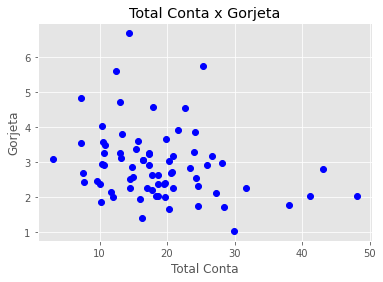

In [ ]:
# Plotando valores preditos
plt.plot(df_final_mult['total_bill'], df_final_mult['tip'], 'bo')
plt.xlabel('Total Conta', fontsize=12)
plt.ylabel('Gorjeta', fontsize=12)
plt.title("Total Conta x Gorjeta")

plt.show()

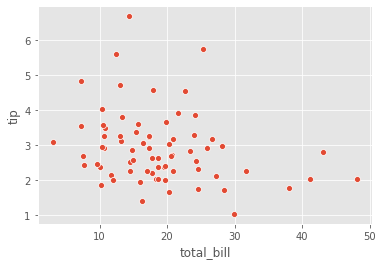

In [ ]:
sns.scatterplot(x="total_bill", y="tip", data=df_final_mult)

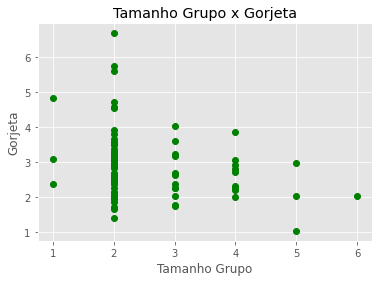

In [ ]:
# Plotando valores preditos
plt.plot(df_final_mult['size_of_group'], df_final_mult['tip'], 'go')
plt.xlabel('Tamanho Grupo', fontsize=12)
plt.ylabel('Gorjeta', fontsize=12)
plt.title("Tamanho Grupo x Gorjeta")

plt.show()